# K-Means Clustering: Airline Customer Value Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# Load Data

Introduction:  
This implementation is based on passenger personal information provided by airlines, by establishing a reasonable customer value evaluation model, grouping customers, comparing and analyzing the characteristics and values of different customer groups, to specify corresponding marketing strategies, thereby reducing customer churn and mining Reach potential customers and achieve profitability. Here, the K-means clustering method is used to group passengers.


In [3]:
df= pd.read_csv('flight.csv')
print(df.head())

   MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/3

In [4]:
# Check the number of features and rows
print('Total Rows:', df.shape[0])
print('Total Features:', df.shape[1])

Total Rows: 62988
Total Features: 23


# Exploratory Data Analysis (EDA)

## 1. Descriptive Analysis
### a. Check Dtype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Data exploration  
A general understanding of the data by calling the describe() function, mainly to view missing values ​​and outliers. Through observation, it is found that the fare is zero, the discount rate is 0, and the total number of flights is 0. Through simple processing, I output a table containing the number of null values, maximum and minimum values ​​of the attributes. The parts are as follows:

Grouping Features Based on Their Data Type

### - Numeric

In [6]:
# statistical summary of numeric features

nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Extreme value of age (110) doesnt make sense.



### - Categorical

In [7]:
# statistical summary of categorical features
cats= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### b. Check Unique values

In [8]:
# View the number of unique values
df[cats].nunique()

FFP_DATE             3068
FIRST_FLIGHT_DATE    3406
GENDER                  2
WORK_CITY            3234
WORK_PROVINCE        1165
WORK_COUNTRY          118
LOAD_TIME               1
LAST_FLIGHT_DATE      731
dtype: int64

In [9]:
df[cats].dtypes

FFP_DATE             object
FIRST_FLIGHT_DATE    object
GENDER               object
WORK_CITY            object
WORK_PROVINCE        object
WORK_COUNTRY         object
LOAD_TIME            object
LAST_FLIGHT_DATE     object
dtype: object

### c. Check Duplicate Values

In [10]:
df.duplicated().sum()

0

There are no duplicated columns.

### d. Check Missing Values

In [11]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

There are several columns with null values: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, and SUM_YR_2

### e. Summary

In [12]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [13]:
# Create summry data Info
list = []

for col in df.columns:
    list.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique()])
df_summary = pd.DataFrame(data=list, columns=['feature', 'data_type', 'null_num','%null','nunique'])
df_summary

,feature,data_type,null_num,%null,nunique
0,MEMBER_NO,int64,0,0.000000,62988
1,FFP_DATE,object,0,0.000000,3068
2,FIRST_FLIGHT_DATE,object,0,0.000000,3406
3,GENDER,object,3,0.004763,2
4,FFP_TIER,int64,0,0.000000,3
5,WORK_CITY,object,2269,3.602273,3234
6,WORK_PROVINCE,object,3248,5.156538,1165
7,WORK_COUNTRY,object,26,0.041278,118
8,AGE,float64,420,0.666794,84
9,LOAD_TIME,object,0,0.000000,1


## 2. Univariate Analysis

### 1. Boxplot and Violinplot

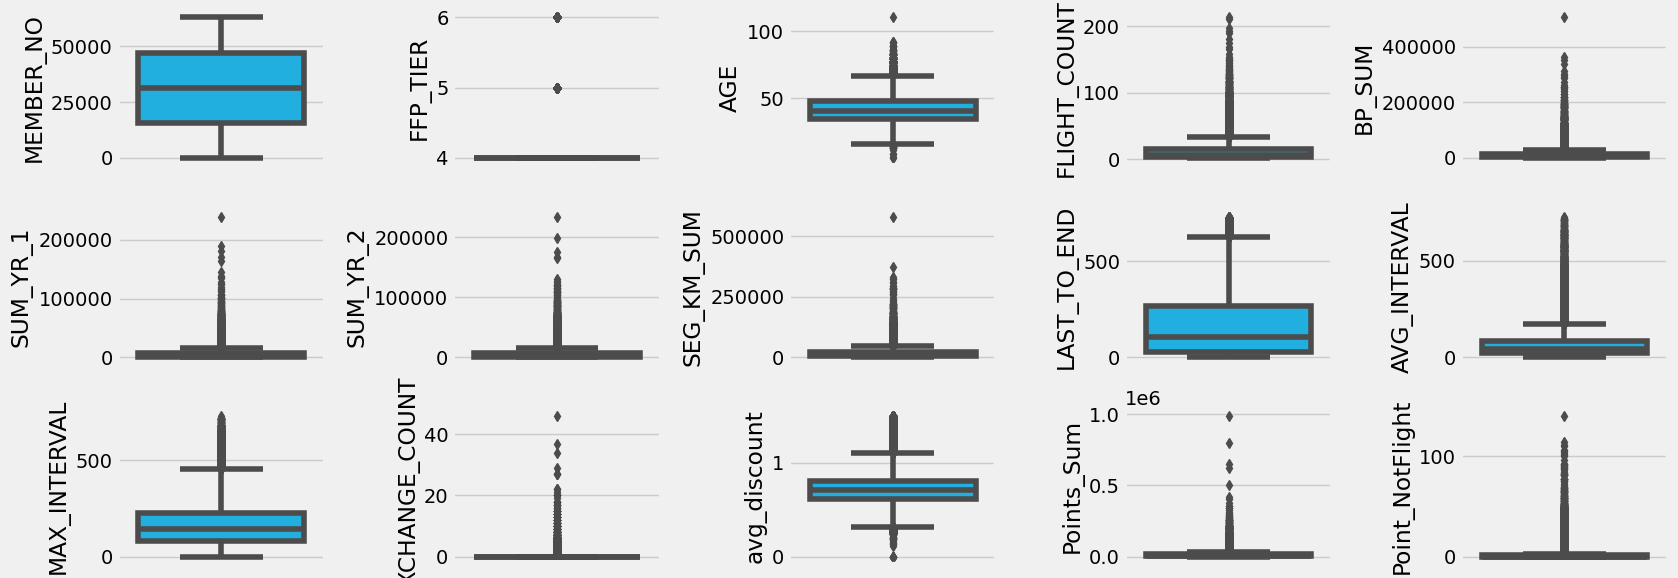

In [16]:
plt.figure(figsize = (17,6))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

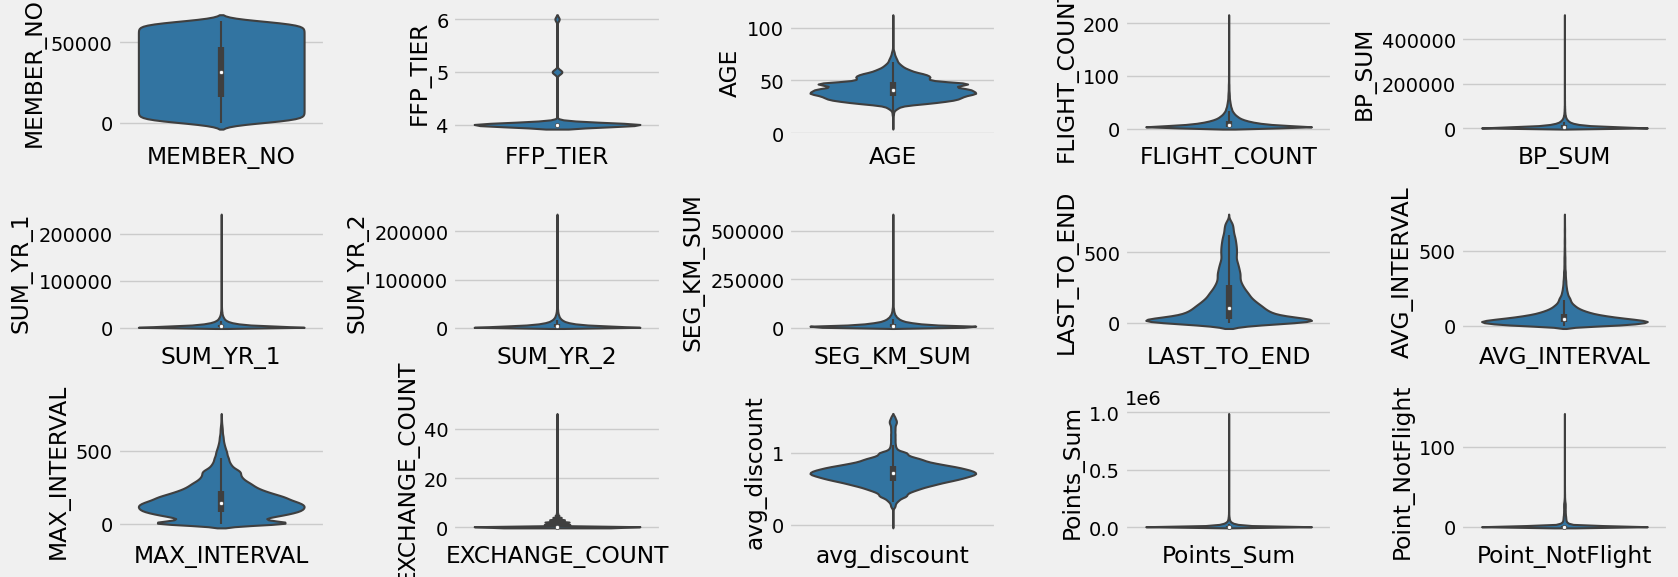

In [17]:
# Create violinplot for numeric feature

plt.figure(figsize=(17,6))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[nums[i]], linewidth=1.5)
    plt.xlabel(nums[i])
    plt.tight_layout()

There are many numeric columns with outliers and right-skewed distributions.  
Check the categorical feature FFP_Tier because it seems to have discrete values ranging from 4 to 6.

### 2. Distribution Plot

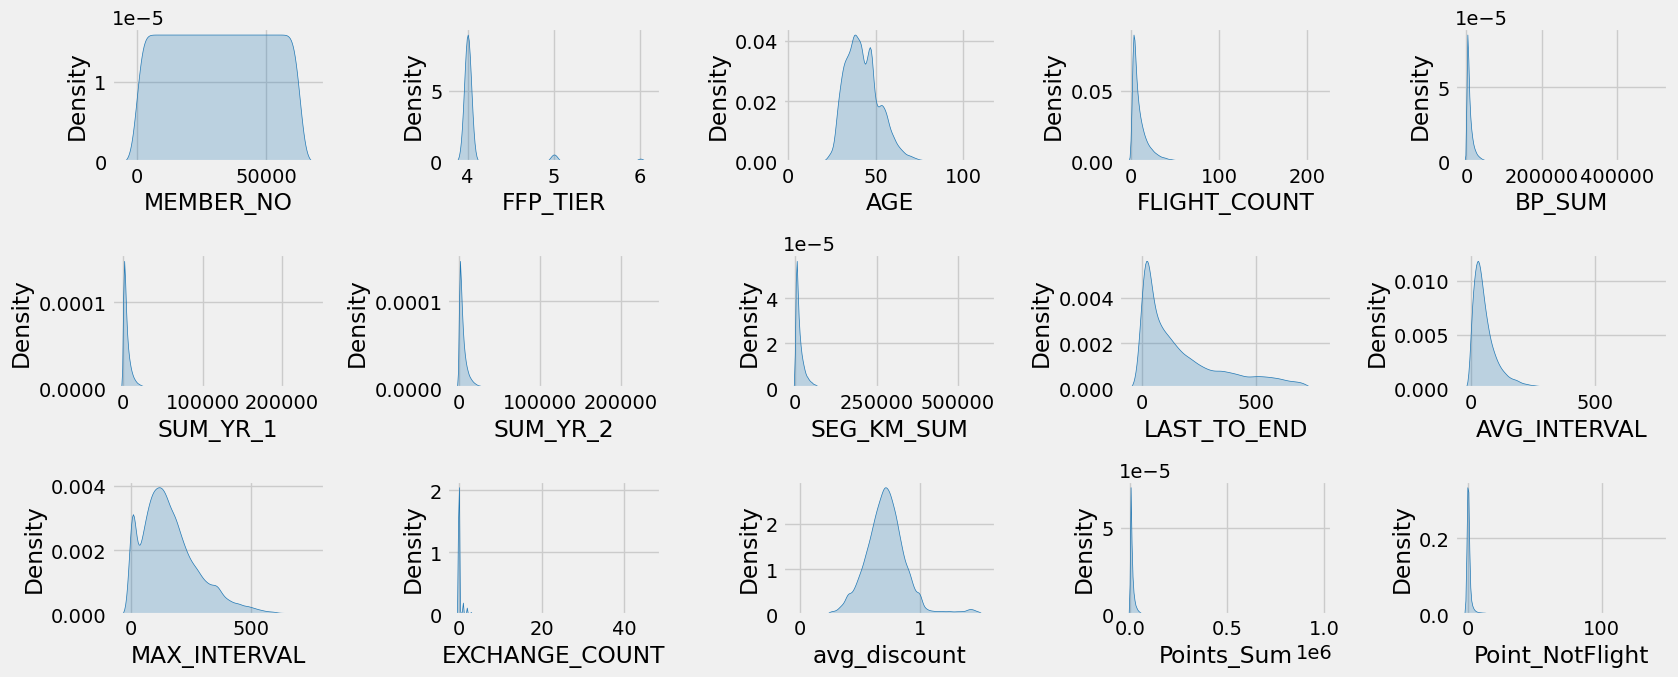

In [18]:
plt.figure(figsize=(17,7))
for i in range(0, len(nums)):
    plt.subplot(3,5, i+1)
    sns.kdeplot(data=df, x=df[nums[i]], fill='True')
    plt.tight_layout()

avg_discount has strange values (more than 1 or 100%).

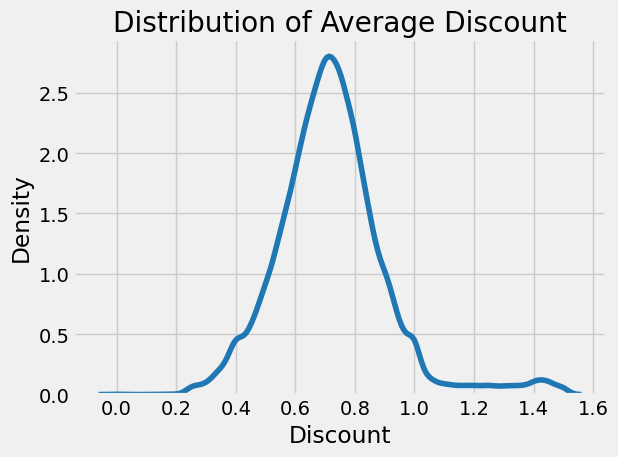

In [17]:
# View KDE plot of the discount feature
ax = sns.kdeplot(x=df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()


It makes no sense that avg_discount has values more than 1 (100%)



In [18]:
# Remove rows where discount is greater than 100%

df = df[df['avg_discount']<=1]
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,60041.0,31505.292833,18191.245419,1.0,15736.000000,31528.00000,47269.000000,62988.0
FFP_TIER,60041.0,4.081727,0.328371,4.0,4.000000,4.00000,4.000000,6.0
AGE,59652.0,42.174797,9.771595,6.0,35.000000,41.00000,48.000000,110.0
FLIGHT_COUNT,60041.0,11.654220,13.756290,2.0,3.000000,7.00000,14.000000,210.0
BP_SUM,60041.0,10034.104778,14010.728738,0.0,2432.000000,5457.00000,12133.000000,505308.0
SUM_YR_1,59499.0,4974.437205,7059.121002,0.0,968.000000,2700.00000,6285.500000,239560.0
SUM_YR_2,59907.0,5210.832374,7667.312231,0.0,755.000000,2676.00000,6531.000000,234188.0
SEG_KM_SUM,60041.0,16772.027931,20335.635374,368.0,4713.000000,9878.00000,20893.000000,580717.0
LAST_TO_END,60041.0,177.260855,184.117824,1.0,30.000000,109.00000,270.000000,731.0
AVG_INTERVAL,60041.0,67.875748,77.374097,0.0,23.500000,44.87500,82.400000,728.0


New dataset with no discount more than 100%



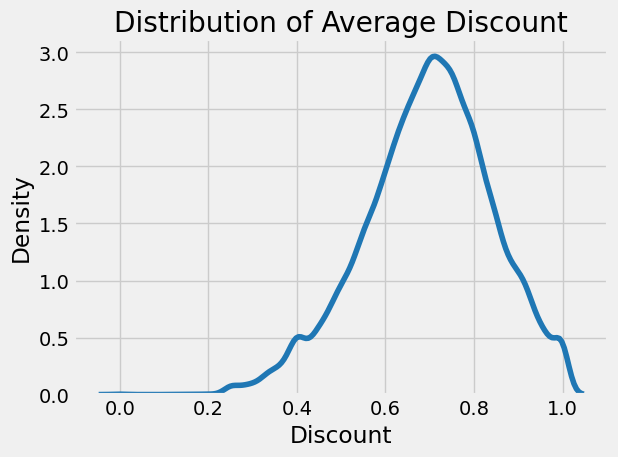

In [19]:
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

No discount > 100%



### 3. Countplot

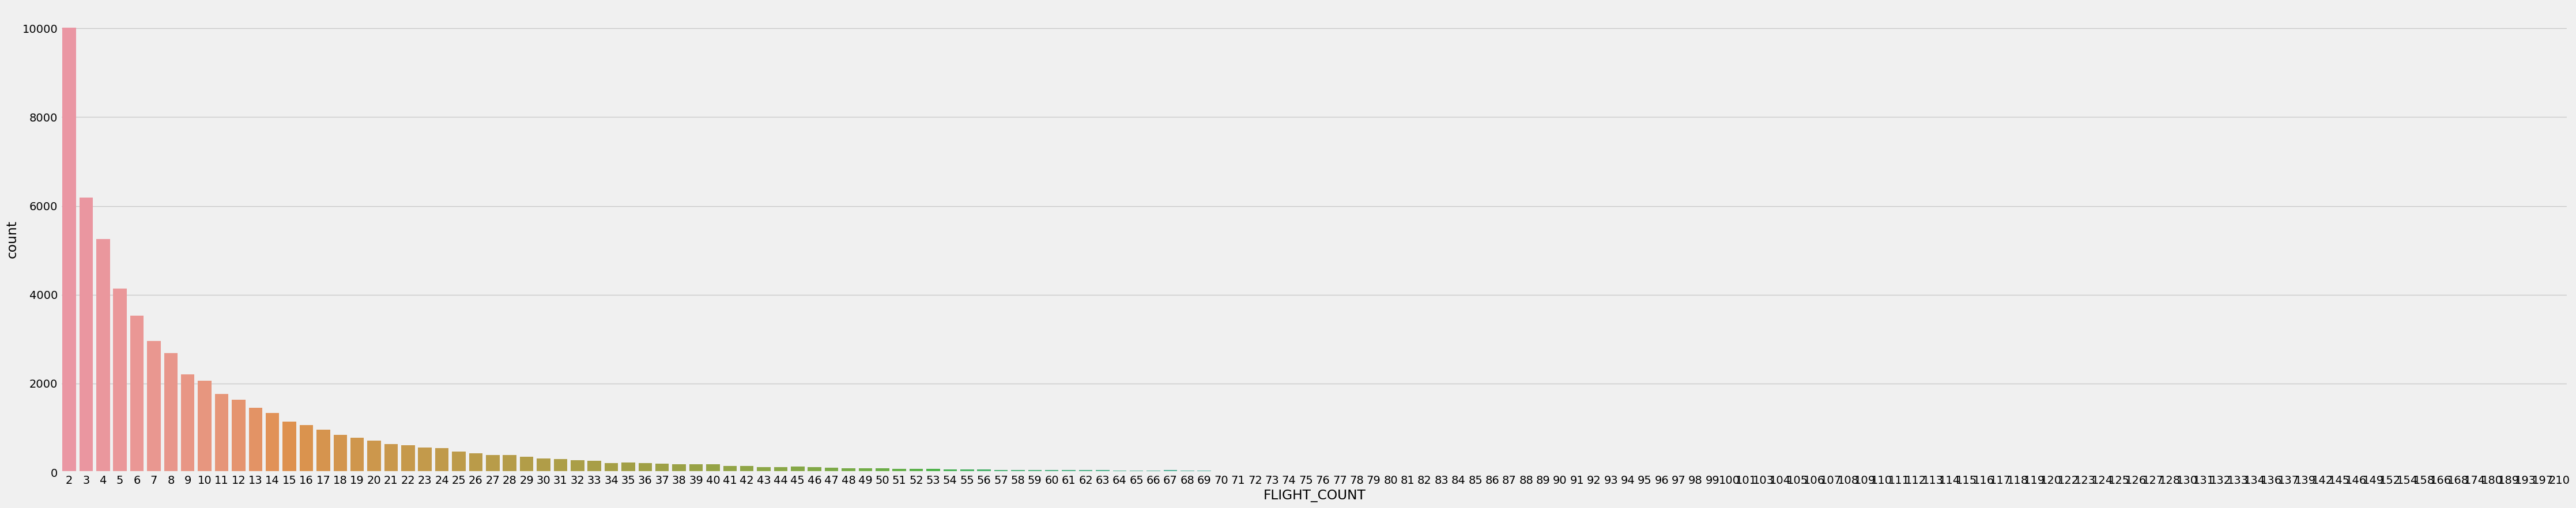

In [20]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x=df["FLIGHT_COUNT"])

The number of flights per customer tends to be low; the more flights there are, the fewer customers there are.

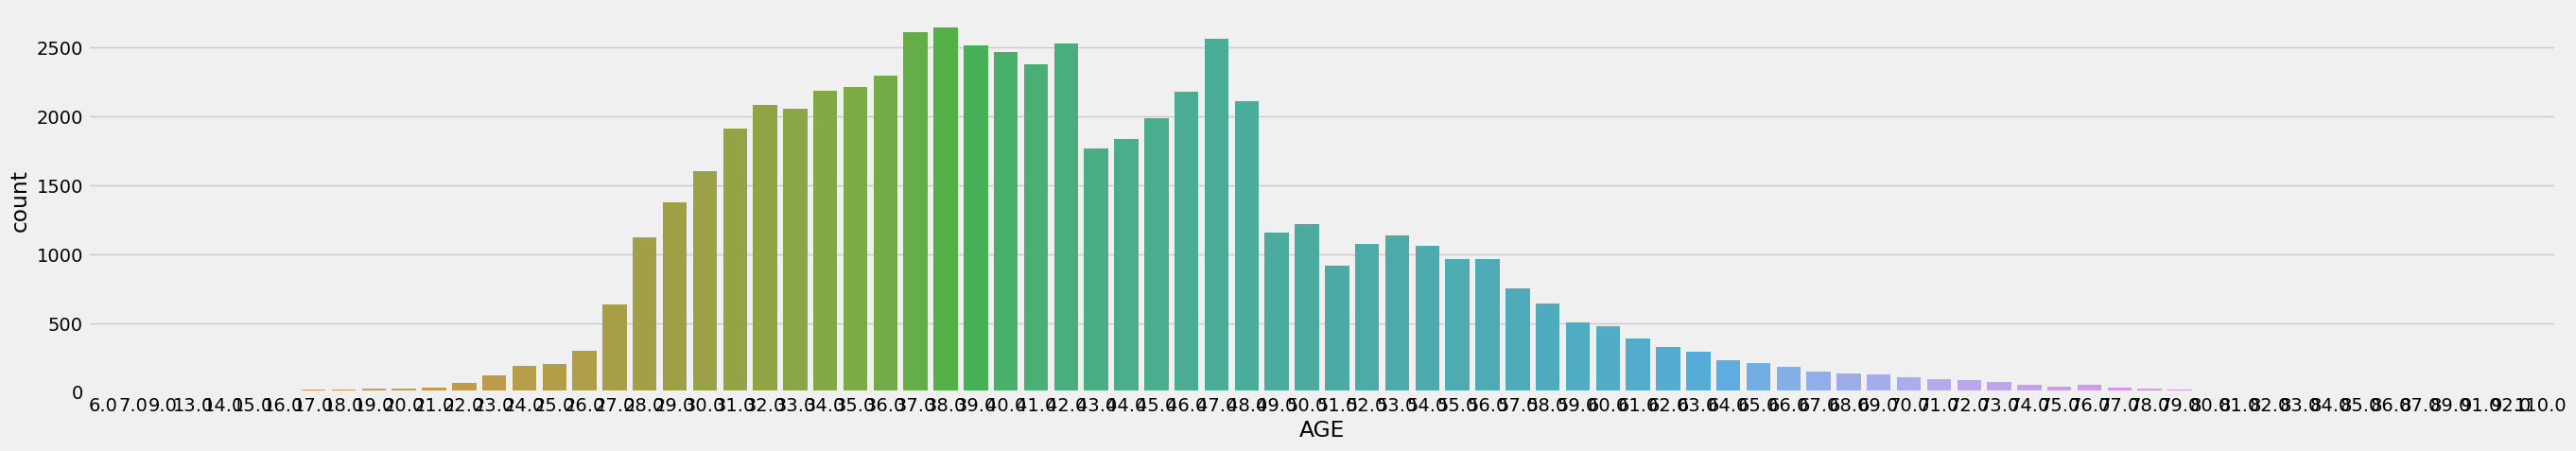

In [21]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["AGE"])

Most customers are aged between 26 and 60.

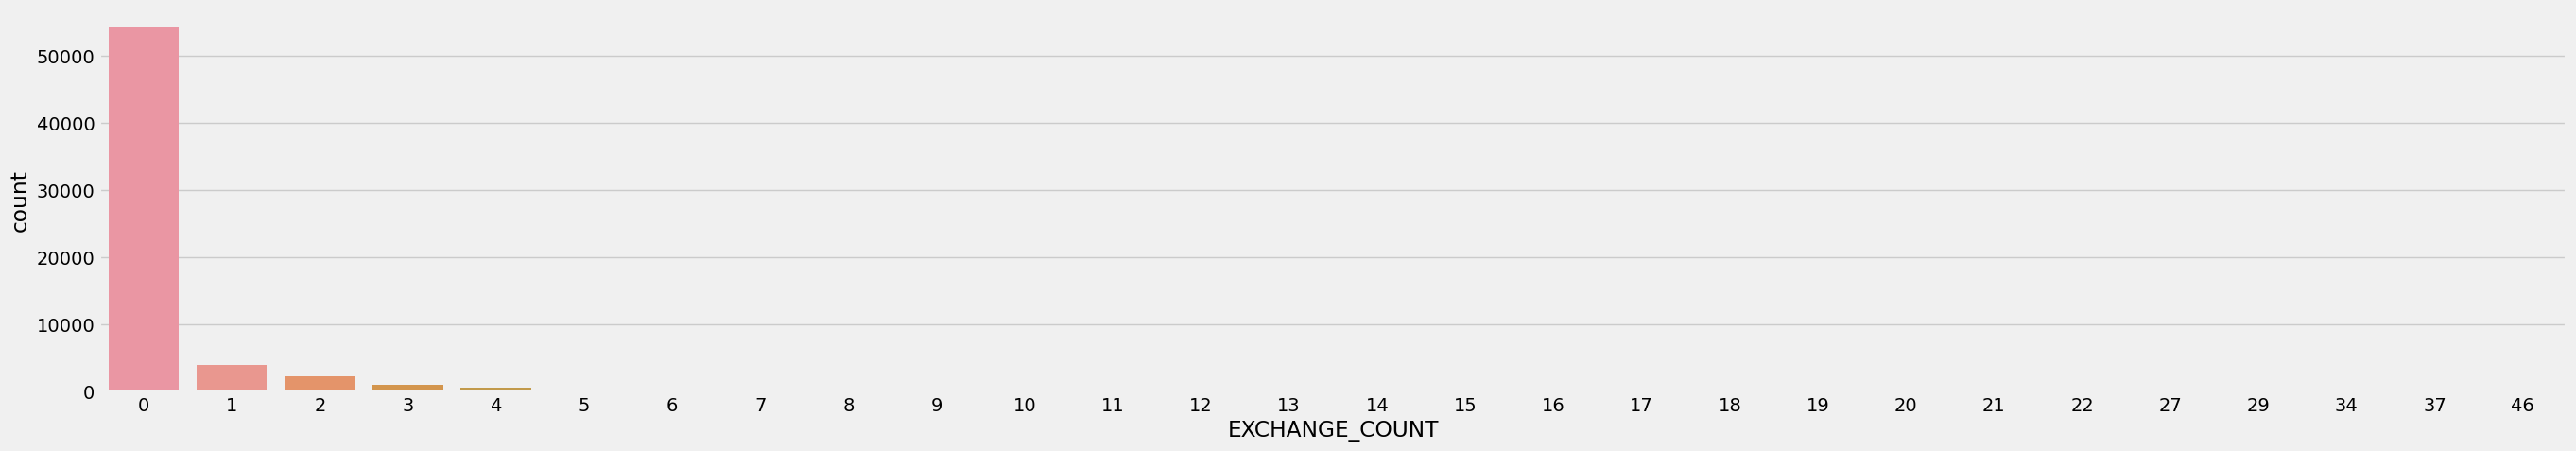

In [20]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["EXCHANGE_COUNT"])

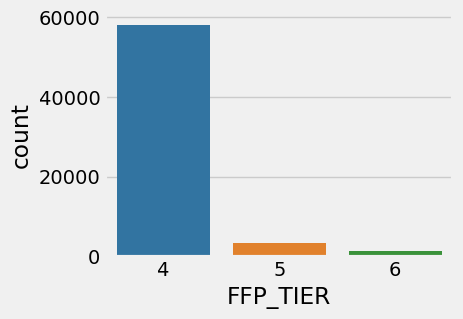

In [21]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x=df["FFP_TIER"])

The feature FFP_TIER is a categorical feature.

## 3. Multivariat Analysis


### Heatmap Plot


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numerical columns
df_numeric = df.drop(columns=['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'])


<Axes: >

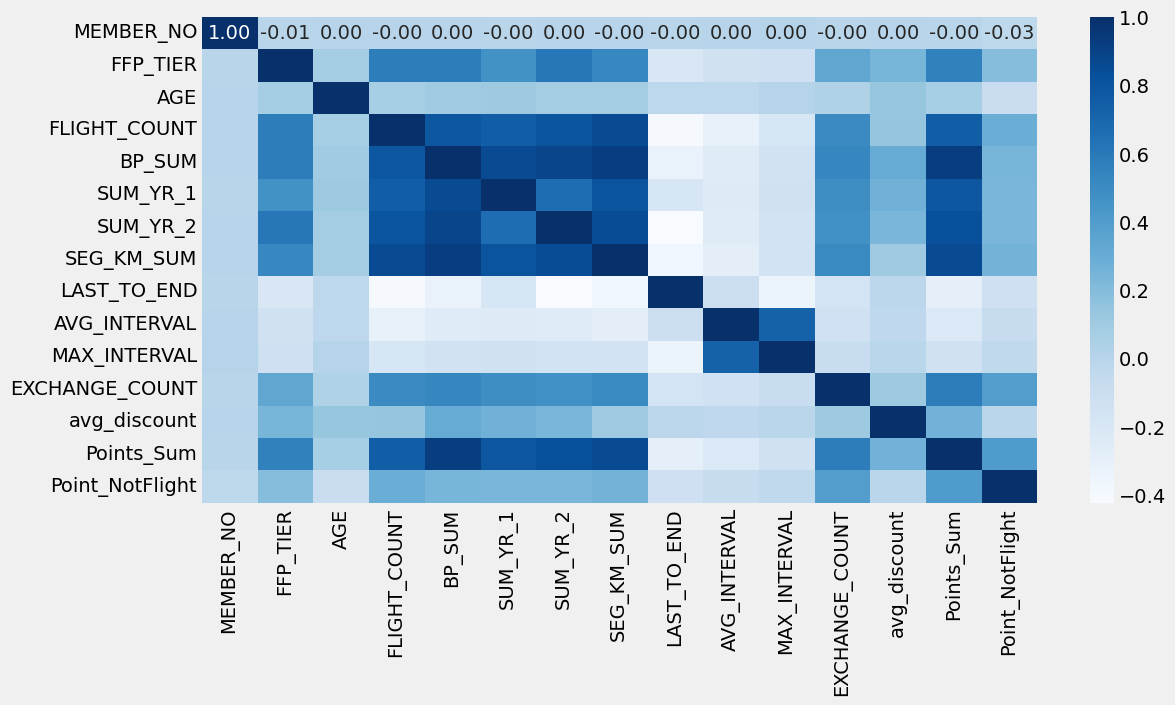

In [23]:

# Calculate the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')

Some columns have high correlation each other (high multicolinearity)

FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, and Points_Sum have high multicolinearity.
AVG_INTERVAL dan MAX_INTERVAL have high multicolinearity.
AGE has very low correlation with all feature

# Data Pre-processing

## 1. Handling Missing Values

In [26]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  1
FFP_TIER                0
WORK_CITY            2102
WORK_PROVINCE        3019
WORK_COUNTRY           23
AGE                   389
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              542
SUM_YR_2              134
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [27]:
# missing values input at age features with median value
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [28]:
# missing values iput at SUM_YR_1 dan SUM_YR_2 with 0 value

df['SUM_YR_1'] = df['SUM_YR_1'].fillna(0)
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(0)

WORK_CITY, WORK_PROVINCE, andWORK_COUNTRY will be dropped because too many unique values and considered as categorical

In [29]:
# delete column work_city, work_province, work_country, gender
df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [30]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

No missing values found.

## 2. Outlier Handling

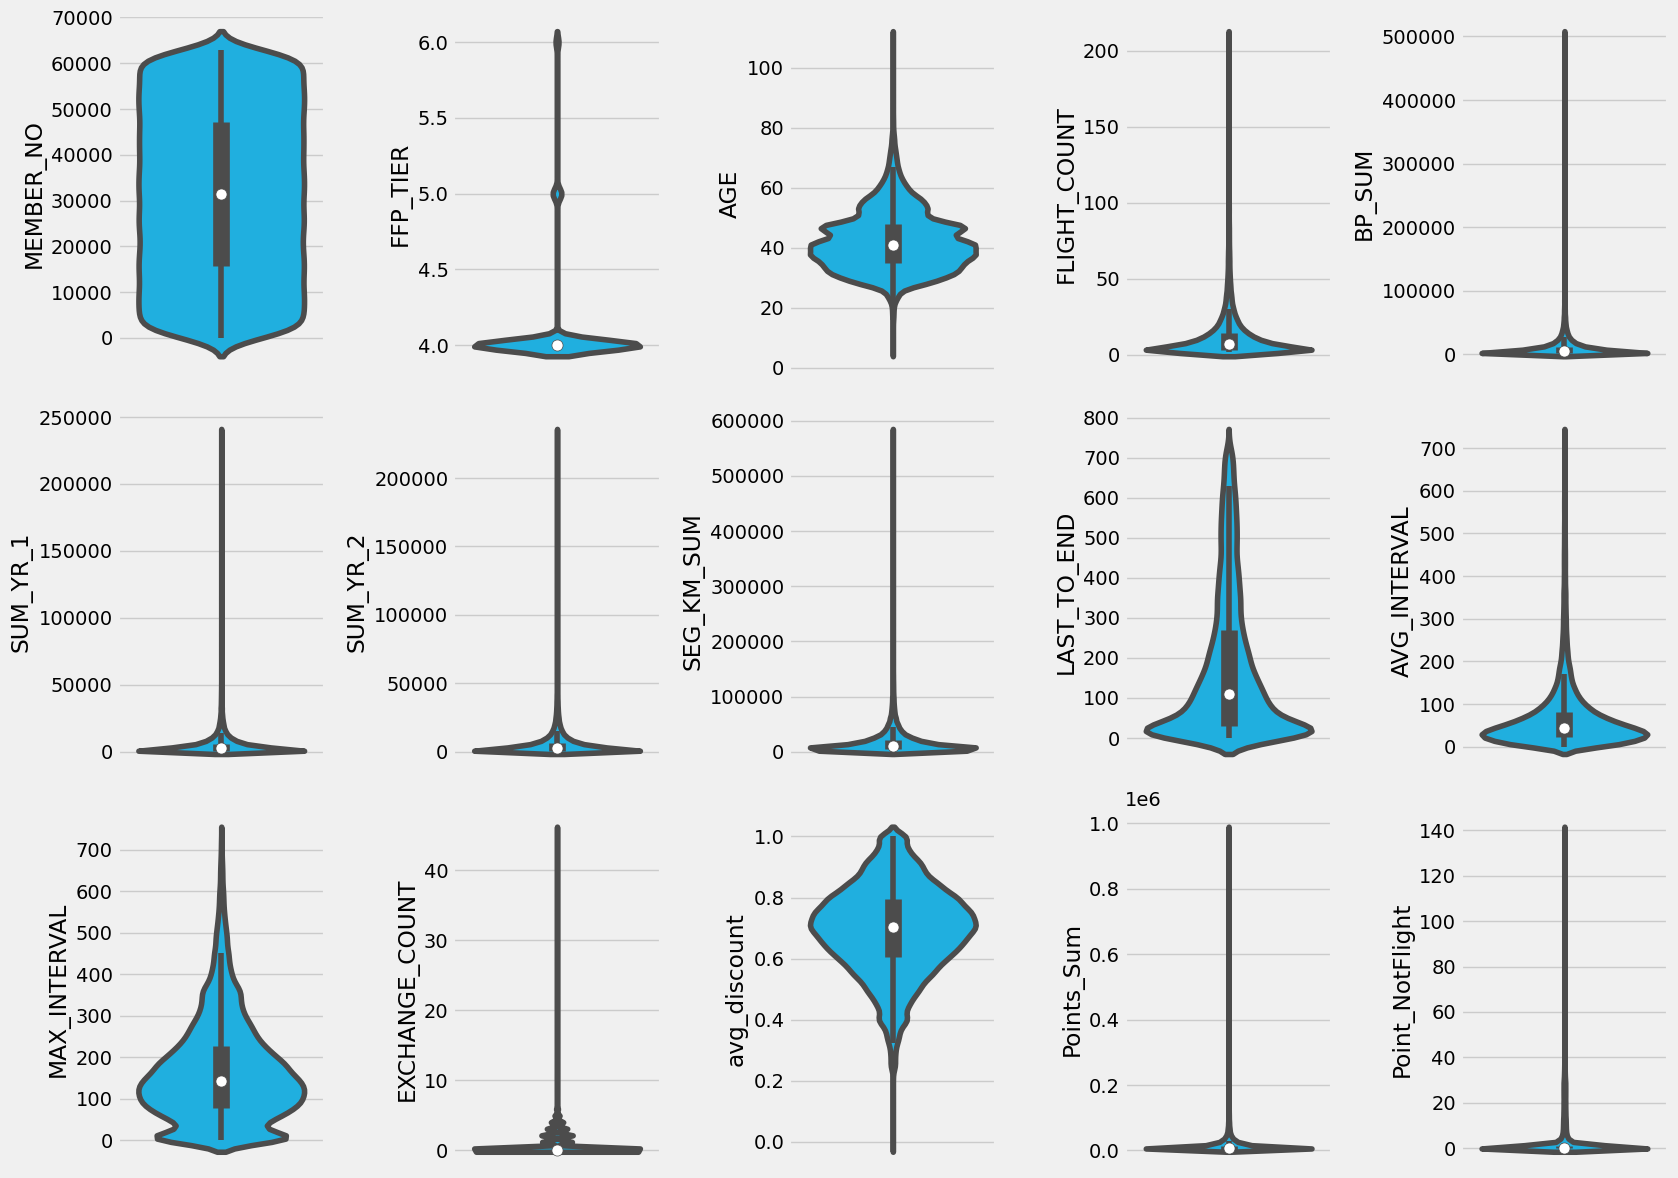

In [31]:
# boxplot

plt.figure(figsize = (17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

Drop outlier with z-score method

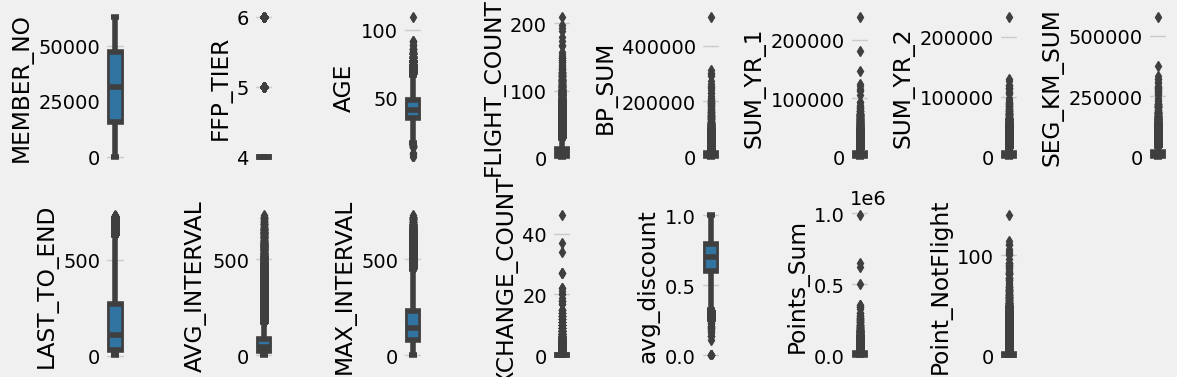

In [32]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

In [33]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Rows BEFORE Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling = {len(df)}')

Total Rows BEFORE Outlier Handling = 60041
Total Rows AFTER Outlier Handling = 52586


## 3. Feature Selection

### Feature Selection 1

Based on the first heatmap:

* The features with low correlation values, which are considered unrelated to the problem-solving process, will be dropped from the dataset:
 `member_no`, `age`, `exchange_count`, `sum_yr_1`, `sum_yr_2`, `point_notflight`, `avg_interval`, `max_interval`



In [34]:
dfx = df.copy()

In [35]:
dfx = dfx.drop(['MEMBER_NO','AGE','EXCHANGE_COUNT','SUM_YR_1','SUM_YR_2','Point_NotFlight','AVG_INTERVAL','MAX_INTERVAL'], axis = 1)

In [36]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Points_Sum
1486,12/21/2009,6/18/2011,4,3/31/2014,18,50855,76005,2/20/2014,41,0.786950,50855
1490,8/18/2009,8/10/2010,4,3/31/2014,9,50586,74714,1/23/2014,69,0.799971,57100
1508,3/9/2011,7/3/2011,4,3/31/2014,10,39739,75964,2/4/2014,57,0.781936,39739
1594,1/17/2010,3/6/2010,5,3/31/2014,37,51180,77711,3/31/2014,1,0.746389,53357
1609,4/1/2008,10/12/2008,5,3/31/2014,12,45008,75167,12/2/2013,121,0.768661,45008


In [37]:
#plt.figure(figsize=(12, 12))
#sns.heatmap(dfx.corr(), cmap='Blues', annot=True, fmt='.2f')

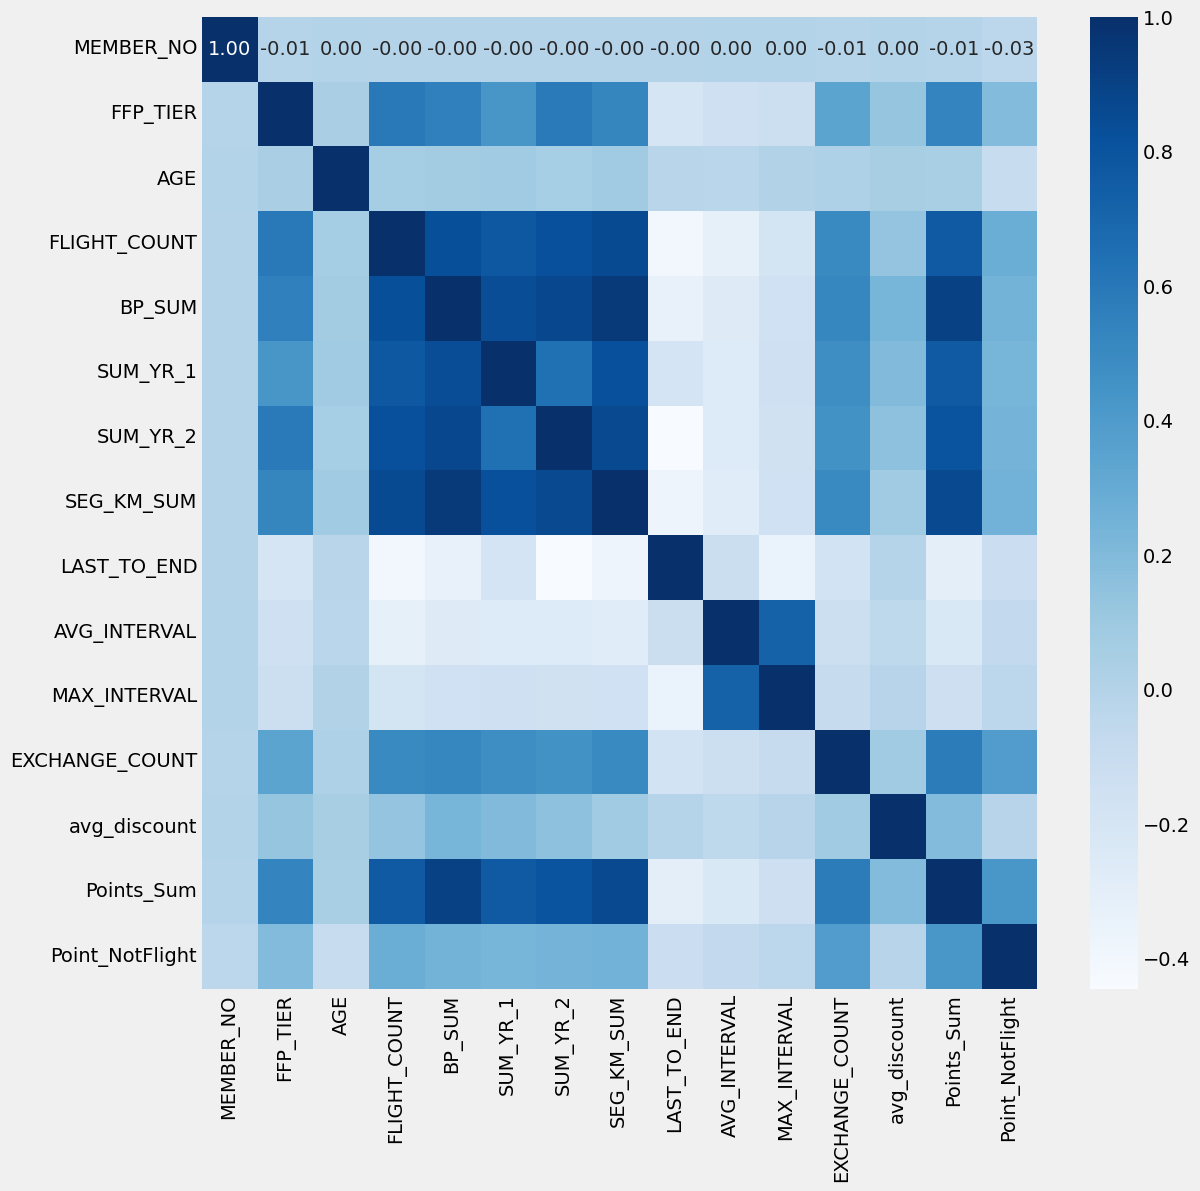

In [38]:
# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

### Feature Selection 2

In [39]:
dfx = dfx.drop(['BP_SUM','Points_Sum'], axis = 1)

In [40]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
1486,12/21/2009,6/18/2011,4,3/31/2014,18,76005,2/20/2014,41,0.786950
1490,8/18/2009,8/10/2010,4,3/31/2014,9,74714,1/23/2014,69,0.799971
1508,3/9/2011,7/3/2011,4,3/31/2014,10,75964,2/4/2014,57,0.781936
1594,1/17/2010,3/6/2010,5,3/31/2014,37,77711,3/31/2014,1,0.746389
1609,4/1/2008,10/12/2008,5,3/31/2014,12,75167,12/2/2013,121,0.768661


Summary:

- The majority of customers are concentrated in the productive age range (27-55 years). This insight suggests that these customers might be undertaking business travel.
- Loyal customers can be identified by examining the number of flights taken per year since becoming a member.
- Long-term customers can be identified by calculating the difference between the date the data was taken and the FFP join date.

Missing features will be added through feature engineering.

### Feature Selection 3

LRFMC analysis is an extended version of RFM analysis that has been used in the aviation industry for years to divide customers into segments. Based on LRFMC analysis we will need 5 variables:

- L (Length of joining member) : The number of months since the member’s joining time from the end of the observation time. => LOAD_TIME - FFP_DATE

- R (Recent flight) : Number of months since the member’s last flight from the end of observation time. => LAST_TO_END

- F (Flight Count) : The total number of times the member has flown during the observation period. => FLIGHT_COUNT

- M (Miles Accumulated) : Miles accumulated during member observation time. => SEG_KM_SUM

- C (Discount Used) : The average value of the discount factor used by the member during the observation period. => avg_discount

## 4. Feature Engineering

In [41]:
dfa = dfx.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52586 entries, 1486 to 62978
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           52586 non-null  object 
 1   FIRST_FLIGHT_DATE  52586 non-null  object 
 2   FFP_TIER           52586 non-null  int64  
 3   LOAD_TIME          52586 non-null  object 
 4   FLIGHT_COUNT       52586 non-null  int64  
 5   SEG_KM_SUM         52586 non-null  int64  
 6   LAST_FLIGHT_DATE   52586 non-null  object 
 7   LAST_TO_END        52586 non-null  int64  
 8   avg_discount       52586 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 4.0+ MB


In [42]:
dfa[dfa['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
2481,2/1/2008,4/16/2008,4,3/31/2014,33,59608,2014/2/29 0:00:00,32,0.802732
2509,3/24/2012,3/24/2012,4,3/31/2014,35,63619,2014/2/29 0:00:00,32,0.748223
2647,3/13/2007,1/2/2011,4,3/31/2014,10,64800,2014/2/29 0:00:00,32,0.717575
2902,12/12/2006,12/13/2006,5,3/31/2014,22,53905,2014/2/29 0:00:00,32,0.826661
3071,4/12/2012,5/6/2012,5,3/31/2014,48,53987,2014/2/29 0:00:00,32,0.803124
...,...,...,...,...,...,...,...,...,...
61539,1/11/2013,7/10/2013,4,3/31/2014,3,3513,2014/2/29 0:00:00,32,0.276667
61871,7/26/2009,7/26/2009,4,3/31/2014,2,1298,2014/2/29 0:00:00,32,0.690000
61909,4/11/2011,4/20/2011,4,3/31/2014,2,2595,2014/2/29 0:00:00,32,0.340000
62721,10/31/2007,3/13/2008,4,3/31/2014,2,1199,2014/2/29 0:00:00,32,0.489525


In [43]:
dfa['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [44]:
cats = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
dfa[cats] = dfa[cats].astype('category')

In [45]:
dfa_cat=dfa.select_dtypes(include='category')
dfa_cat.head(5)

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
1486,12/21/2009,6/18/2011,3/31/2014,2/20/2014
1490,8/18/2009,8/10/2010,3/31/2014,1/23/2014
1508,3/9/2011,7/3/2011,3/31/2014,2/4/2014
1594,1/17/2010,3/6/2010,3/31/2014,3/31/2014
1609,4/1/2008,10/12/2008,3/31/2014,12/2/2013


In [46]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfa_num=dfa.select_dtypes(include=numeric)
dfa_num.describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,52586.0,4.030312,0.171447,4.000000,4.000000,4.0,4.000000,5.0
FLIGHT_COUNT,52586.0,9.702468,8.888596,2.000000,3.000000,7.0,13.000000,52.0
SEG_KM_SUM,52586.0,13801.924581,12691.565397,368.000000,4711.000000,9440.0,18619.750000,77711.0
LAST_TO_END,52586.0,187.798825,187.251404,1.000000,35.000000,120.0,291.000000,729.0
avg_discount,52586.0,0.694146,0.142486,0.264214,0.602548,0.7,0.792019,1.0


In [47]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52586 entries, 1486 to 62978
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   FFP_DATE           52586 non-null  category
 1   FIRST_FLIGHT_DATE  52586 non-null  category
 2   FFP_TIER           52586 non-null  int64   
 3   LOAD_TIME          52586 non-null  category
 4   FLIGHT_COUNT       52586 non-null  int64   
 5   SEG_KM_SUM         52586 non-null  int64   
 6   LAST_FLIGHT_DATE   52586 non-null  category
 7   LAST_TO_END        52586 non-null  int64   
 8   avg_discount       52586 non-null  float64 
dtypes: category(4), float64(1), int64(4)
memory usage: 3.0 MB


In [48]:
dfa["LOAD_TIME"] = pd.to_datetime(dfa["LOAD_TIME"], errors='coerce')
dfa["FFP_DATE"] = pd.to_datetime(dfa["FFP_DATE"], errors='coerce')
dfa["FIRST_FLIGHT_DATE"] = pd.to_datetime(dfa["FIRST_FLIGHT_DATE"], errors='coerce')
dfa["LAST_FLIGHT_DATE"] = pd.to_datetime(dfa["LAST_FLIGHT_DATE"], errors='coerce')

In [49]:
dfa["LOAD_TIME"] = dfa["LOAD_TIME"].values.astype('datetime64[ns]')
dfa["FFP_DATE"] = dfa["FFP_DATE"].values.astype('datetime64[ns]')
dfa["FIRST_FLIGHT_DATE"] = dfa["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
dfa["LAST_FLIGHT_DATE"] = dfa["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [50]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52586 entries, 1486 to 62978
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           52586 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  52586 non-null  datetime64[ns]
 2   FFP_TIER           52586 non-null  int64         
 3   LOAD_TIME          52586 non-null  datetime64[ns]
 4   FLIGHT_COUNT       52586 non-null  int64         
 5   SEG_KM_SUM         52586 non-null  int64         
 6   LAST_FLIGHT_DATE   52235 non-null  datetime64[ns]
 7   LAST_TO_END        52586 non-null  int64         
 8   avg_discount       52586 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(4)
memory usage: 4.0 MB


In [51]:
import pandas as pd

# Calculate the difference in months
dfa['Meeting_Time'] = (dfa['LOAD_TIME'] - dfa['FFP_DATE']) / pd.Timedelta(days=30.436875)  # Average days per month

# Round the values to nearest whole number
dfa['Meeting_Time'] = dfa['Meeting_Time'].round()

# Convert to numeric if needed
dfa['Meeting_Time'] = pd.to_numeric(dfa['Meeting_Time'])


In [52]:
#dfa['Meeting_Time'] = (dfa['LOAD_TIME'] - dfa['FFP_DATE'])/np.timedelta64(1,'M')

In [53]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time
1486,2009-12-21,2011-06-18,4,2014-03-31,18,76005,2014-02-20,41,0.786950,51.0
1490,2009-08-18,2010-08-10,4,2014-03-31,9,74714,2014-01-23,69,0.799971,55.0
1508,2011-03-09,2011-07-03,4,2014-03-31,10,75964,2014-02-04,57,0.781936,37.0
1594,2010-01-17,2010-03-06,5,2014-03-31,37,77711,2014-03-31,1,0.746389,50.0
1609,2008-04-01,2008-10-12,5,2014-03-31,12,75167,2013-12-02,121,0.768661,72.0


In [54]:
#dfa['Flight_Count/Year']= dfa['FLIGHT_COUNT']/ ((dfa['LAST_FLIGHT_DATE'] - dfa['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

In [55]:
# Calculate the number of days between FIRST_FLIGHT_DATE and LAST_FLIGHT_DATE
days_between_flights = (dfa['LAST_FLIGHT_DATE'] - dfa['FIRST_FLIGHT_DATE']).dt.days

# Calculate Flight_Count/Year
dfa['Flight_Count/Year'] = dfa['FLIGHT_COUNT'] / (days_between_flights / 365.25)  # 365.25 days in a year on average

# Round to two decimal places if needed
dfa['Flight_Count/Year'] = dfa['Flight_Count/Year'].round(2)


In [56]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
1486,2009-12-21,2011-06-18,4,2014-03-31,18,76005,2014-02-20,41,0.786950,51.0,6.72
1490,2009-08-18,2010-08-10,4,2014-03-31,9,74714,2014-01-23,69,0.799971,55.0,2.60
1508,2011-03-09,2011-07-03,4,2014-03-31,10,75964,2014-02-04,57,0.781936,37.0,3.86
1594,2010-01-17,2010-03-06,5,2014-03-31,37,77711,2014-03-31,1,0.746389,50.0,9.09
1609,2008-04-01,2008-10-12,5,2014-03-31,12,75167,2013-12-02,121,0.768661,72.0,2.34


In [57]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52586 entries, 1486 to 62978
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           52586 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  52586 non-null  datetime64[ns]
 2   FFP_TIER           52586 non-null  int64         
 3   LOAD_TIME          52586 non-null  datetime64[ns]
 4   FLIGHT_COUNT       52586 non-null  int64         
 5   SEG_KM_SUM         52586 non-null  int64         
 6   LAST_FLIGHT_DATE   52235 non-null  datetime64[ns]
 7   LAST_TO_END        52586 non-null  int64         
 8   avg_discount       52586 non-null  float64       
 9   Meeting_Time       52586 non-null  float64       
 10  Flight_Count/Year  52235 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(4)
memory usage: 4.8 MB


In [58]:
dfa = dfa.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT'], axis = 1)

In [59]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52586 entries, 1486 to 62978
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_TIER           52586 non-null  int64  
 1   SEG_KM_SUM         52586 non-null  int64  
 2   LAST_TO_END        52586 non-null  int64  
 3   avg_discount       52586 non-null  float64
 4   Meeting_Time       52586 non-null  float64
 5   Flight_Count/Year  52235 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 2.8 MB


In [60]:
dfa.head()

,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
1486,4,76005,41,0.786950,51.0,6.72
1490,4,74714,69,0.799971,55.0,2.60
1508,4,75964,57,0.781936,37.0,3.86
1594,5,77711,1,0.746389,50.0,9.09
1609,5,75167,121,0.768661,72.0,2.34


In [61]:
dfa.isnull().sum()

FFP_TIER               0
SEG_KM_SUM             0
LAST_TO_END            0
avg_discount           0
Meeting_Time           0
Flight_Count/Year    351
dtype: int64

Based on the second heatmap:
* **Important features**: Selected using the LRFMC model where the features used for this model are: `load_time`, `ffp_date`, `last_to_end`, `flight_count`, `seg_km_sum`, `avg_discount`* 
- From the EDA (heatmap), it was also observed that features with very high correlation such as `bp_sum`, `seg_km_sum`, and `point_sum` can be reduced by selecting only one for modeling. Therefore, `seg_km_sum` will be retained and `bp_sum` and `point_sum` will be dropped.


"So the 6 features that will be used ar
e:
1. FFP_TIER,
2. SEG_KM_SUM,
3. LAST_TO_END,
4. avg_discount,
5. Meeting_Time,
6. Flight_Count/Year

based on the results of feature enineering."

## Handle Outliers

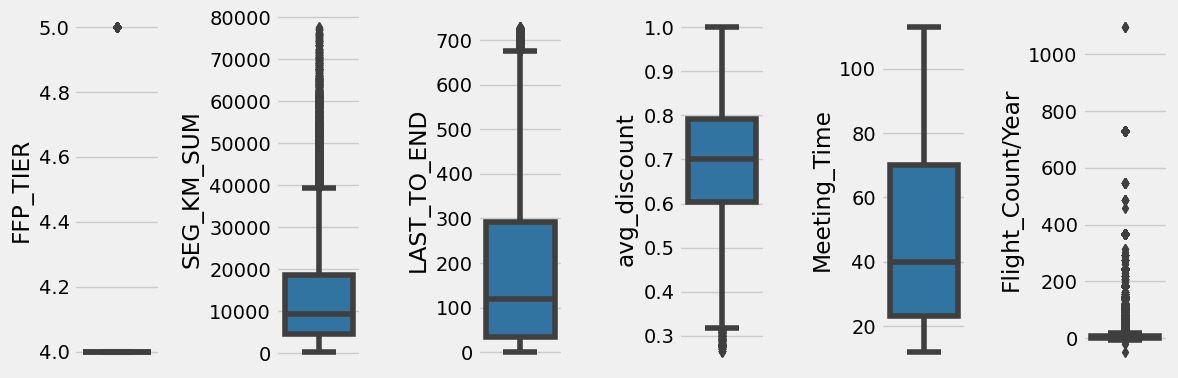

In [62]:
nums=['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = dfa[nums[i]], orient='v')
    plt.tight_layout()

In [63]:
print(f'Number of rows before filtering outliers: {len(dfa)}')

filter_entries = np.array([True] * len(dfa))
for col in ['SEG_KM_SUM', 'LAST_TO_END', 'avg_discount', 'Meeting_Time', 'Flight_Count/Year']:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_entries = ((dfa[col] >= low_limit) & (dfa[col] <= high_limit)) & filter_entries
    
dfa = dfa[filter_entries].reset_index()

print('Number of rows after filtering outliers:', len(dfa))

Number of rows before filtering outliers: 52586
Number of rows after filtering outliers: 43692


In [64]:
dfa = dfa.drop(['FFP_TIER'], axis = 1)

## Standardization

In [65]:
# Filter out rows containing np.nan, np.inf, or -np.inf
dfa = dfa[~dfa.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

In [66]:
from sklearn.preprocessing import StandardScaler
feats = ['SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']
X = dfa[feats].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feats)

In [67]:
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,2.968538,-1.013347,2.145357,1.434852,-0.019216
1,3.016688,0.264739,2.050399,0.110685,-0.324675
2,2.962199,-0.835009,2.135164,0.441727,0.095331
3,2.975210,-0.930122,2.019847,1.545200,-0.123581
4,2.916051,-0.472389,1.984490,1.287723,-0.031944


# Clustering: K-means

<Axes: >

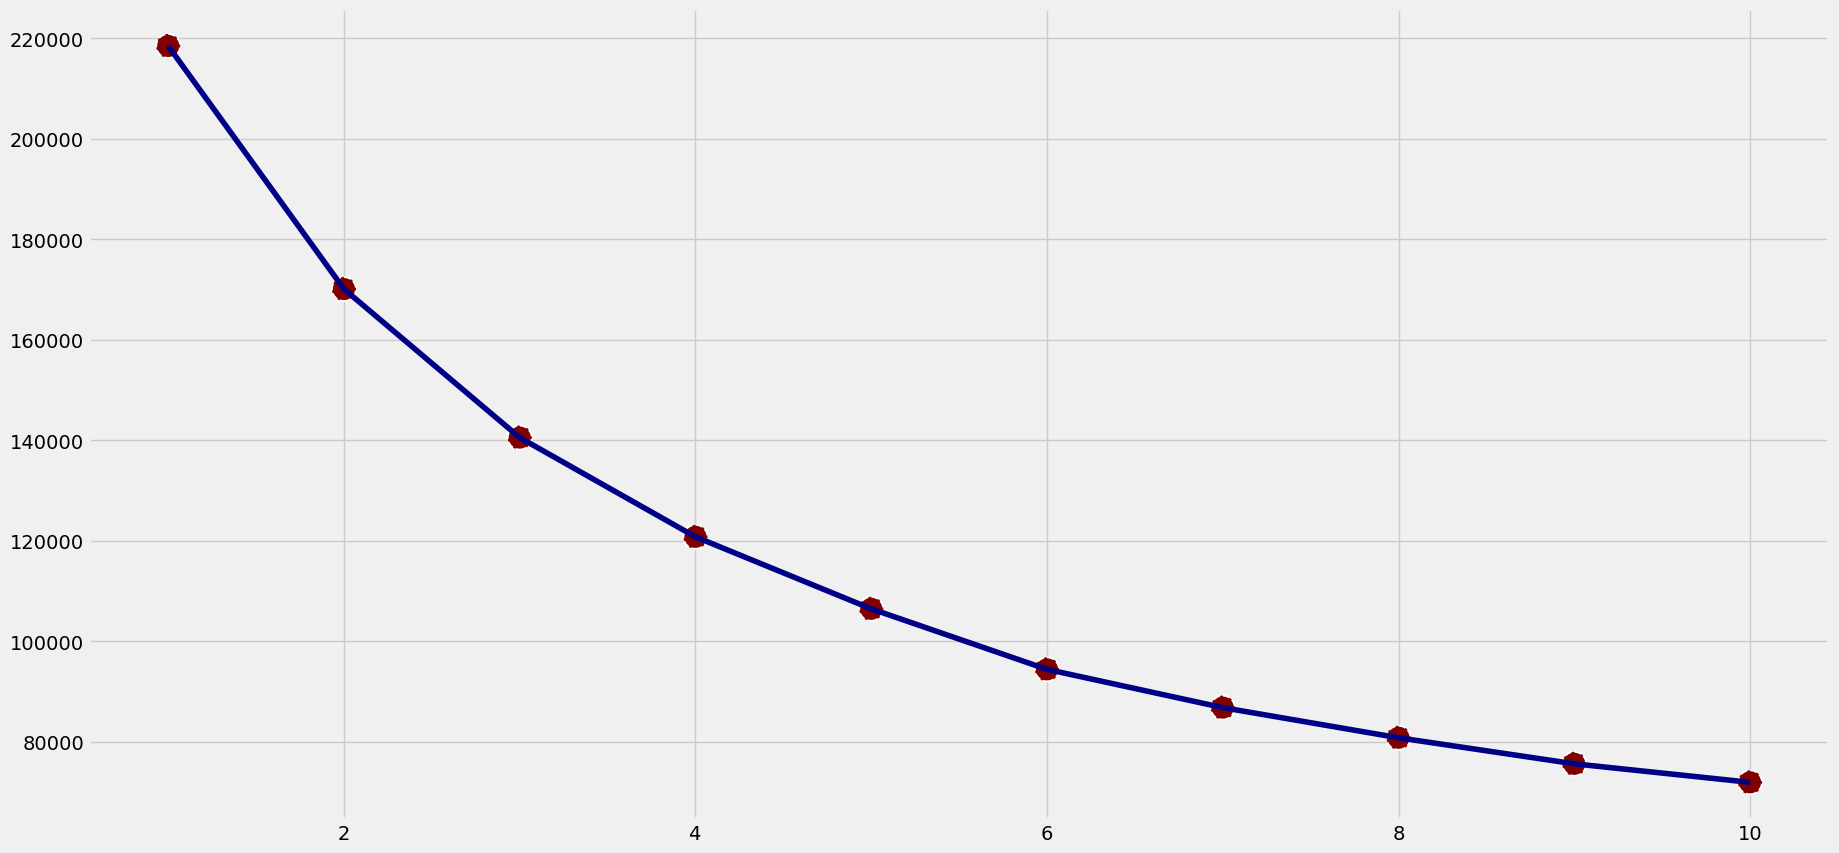

In [68]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)

KMeans(n_clusters=4, random_state=0)

In [70]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year,cluster
0,2.968538,-1.013347,2.145357,1.434852,-0.019216,1
1,3.016688,0.264739,2.050399,0.110685,-0.324675,1
2,2.962199,-0.835009,2.135164,0.441727,0.095331,1
3,2.975210,-0.930122,2.019847,1.545200,-0.123581,1
4,2.916051,-0.472389,1.984490,1.287723,-0.031944,1


In [71]:
dfa['cluster'] = kmeans.labels_

In [72]:
display(dfa.groupby('cluster').agg(['mean','median']))

index             SEG_KM_SUM          LAST_TO_END         \
                 mean   median          mean   median        mean median   
cluster                                                                    
0        40121.637967  39753.0   8032.749406   7210.0  123.344180  108.0   
1        27322.150222  24792.0  15407.770345  13879.0   93.034577   72.0   
2        45712.099049  47462.0   5536.082870   4427.0  452.486723  448.0   
3        20828.474106  17707.0  20091.342886  19686.0  113.645492   68.0   

        avg_discount           Meeting_Time        Flight_Count/Year         
                mean    median         mean median              mean median  
cluster                                                                      
0           0.660346  0.665716    31.629760   30.0          3.840827   3.52  
1           0.706815  0.709972    79.528619   79.0          2.180918   1.81  
2           0.733846  0.743308    52.907003   49.0          2.734055   1.60  
3           0.708322  0.712388    28.378991   24.0         10.237688   9.76

# PCA

In [73]:
## Performing PCA for Visualization
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [74]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,0.713327,-2.463423,1
1,0.910905,-1.290348,1
2,1.092391,-2.125554,1
3,0.602007,-2.448525,1
4,0.695635,-2.024484,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

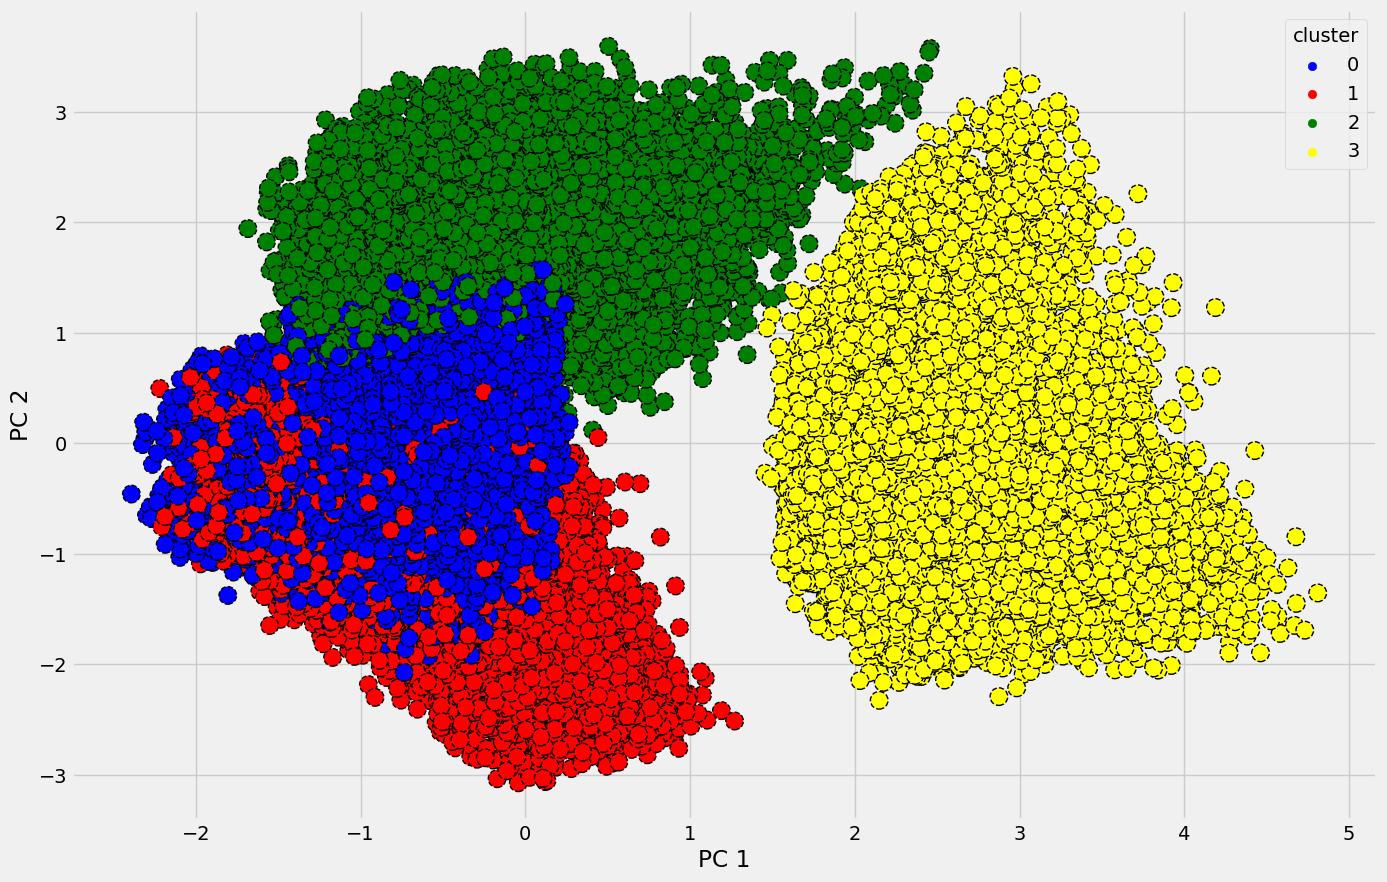

In [75]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

<Axes: xlabel='PC 1', ylabel='PC 2'>

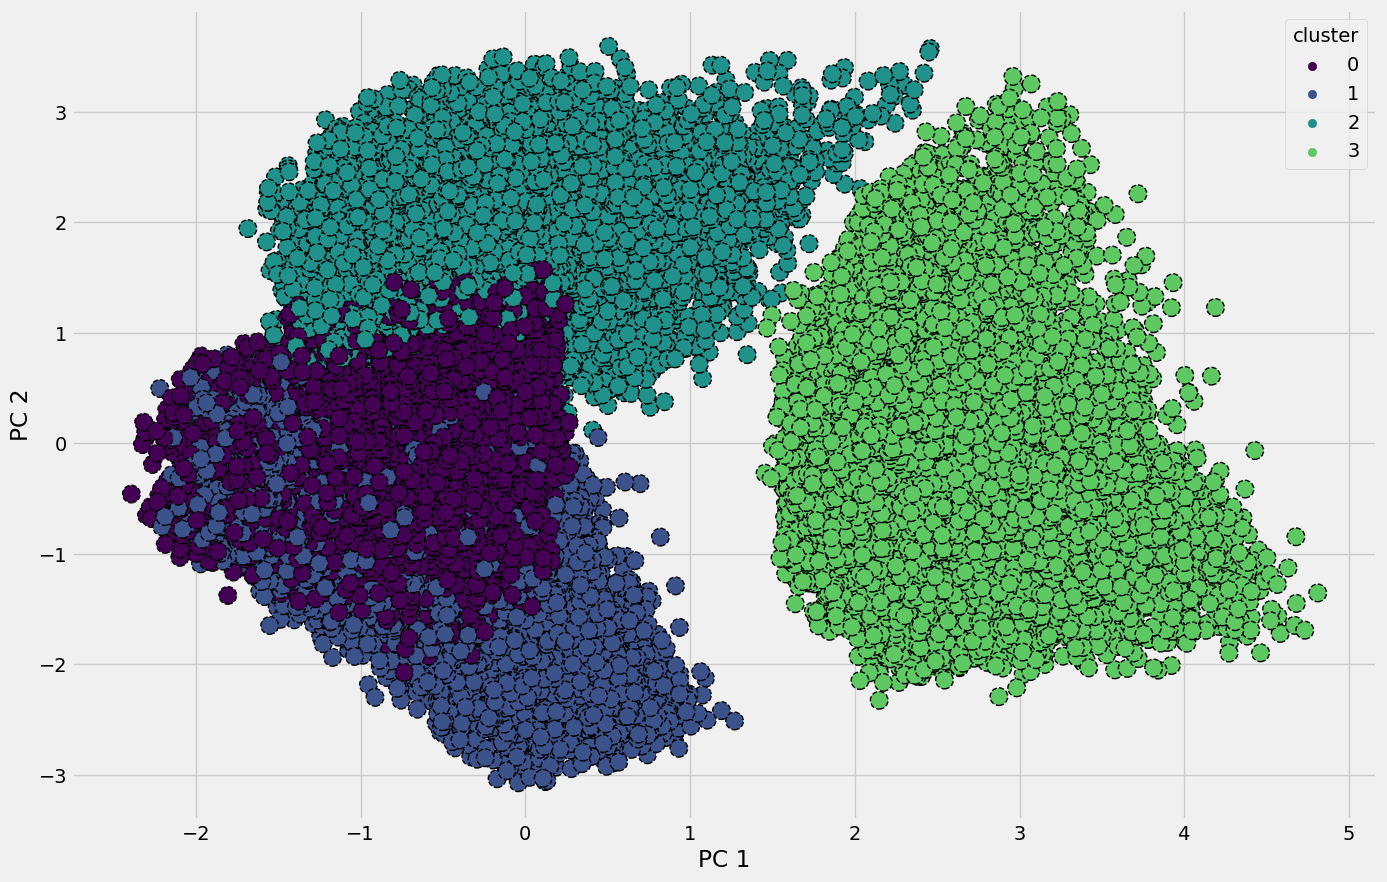

In [76]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['#440154','#3b528b','#21918c','#5ec962'],
    s=160,
    ax=ax
)

---

**Author:** Noman Iqbal  
**Email:** [thenomaniqbal@gmail.com](mailto:thenomaniqbal@gmail.com)

All code in this notebook is written by me.  
Feel free to contact me for questions or collaboration opportunities.

---
